## Importations

In [1]:
import pandas as pd
import numpy as np
import sqlalchemy as sql
import configparser
import datetime
import seaborn as sns
import matplotlib.pyplot as plt 
import io
import boto3

## Configuration

In [2]:
config = configparser.ConfigParser()
config.read('../config/default.ini')

['../config/default.ini']

In [3]:
engine = sql.create_engine('postgresql://{}:{}@{}:{}/{}'.format(config['DATABASE']['username'], config['DATABASE']['password'].replace('_percentage_', '%'), config['DATABASE']['host'], config['DATABASE']['port'], config['DATABASE']['database']))

## Utilitaires

In [4]:
def export_df(df, name, date=True):
    df.to_csv('output/{}{}.csv'.format('{}_'.format(datetime.datetime.strftime(datetime.datetime.now(), '%y%m%d')) if date else '', name), index=False, encoding='utf-8-sig')

In [5]:
def export_fig(plot, name, date=True):
    plot.savefig('images/{}{}.png'.format('{}_'.format(datetime.datetime.strftime(datetime.datetime.now(), '%y%m%d')) if date else '', name))

## Données

### Read from S3

In [6]:
s3 = boto3.client('s3')
bucket = 'big-data-media'
data = s3.get_object(Bucket=bucket, Key='playground/actito/input/names_proba_db.csv')
df = pd.read_csv(io.BytesIO(data['Body'].read()), encoding='utf-8-sig')

In [9]:
df.head()

preusuel  1900  1901  1902  1903  1904  1905  1906  1907  1908  ...  \
0    AADIL   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1    AAHIL   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2   AALIYA   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3  AALIYAH   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4    AALYA   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

       2010      2011      2012      2013      2014      2015      2016  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.043643  0.059456  0.077799  0.064516  0.100569  0.089184  0.091714   
4  0.500000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

       2017      2018      2019  
0  0.000000  0.000000  0.000000  
1  0.000000  0.000000  0.000000  
2  1.000000  0.000000  0.000000  
3  0.094244  0.086022  0.113219  
4  0.000000  0.500000  0.000000  

[5 rows x 121 columns]

In [15]:
list(df.columns)

['preusuel',
 '1900',
 '1901',
 '1902',
 '1903',
 '1904',
 '1905',
 '1906',
 '1907',
 '1908',
 '1909',
 '1910',
 '1911',
 '1912',
 '1913',
 '1914',
 '1915',
 '1916',
 '1917',
 '1918',
 '1919',
 '1920',
 '1921',
 '1922',
 '1923',
 '1924',
 '1925',
 '1926',
 '1927',
 '1928',
 '1929',
 '1930',
 '1931',
 '1932',
 '1933',
 '1934',
 '1935',
 '1936',
 '1937',
 '1938',
 '1939',
 '1940',
 '1941',
 '1942',
 '1943',
 '1944',
 '1945',
 '1946',
 '1947',
 '1948',
 '1949',
 '1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009

In [8]:
decades = [[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], [1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005], [1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995], [1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985], [1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975], [1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965], [1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955], [1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945], [1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935], [1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925]]
publics = [[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], [1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006], [1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996], [1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984]]

In [21]:
df_census_decades = df.copy()
columns = []
for sett in decades:
    category_columns=[]
    for col_name in sett:
        if str(col_name) in df.columns:
            category_columns.append(str(col_name))
        else:
            print('Category not found:', col_name)
       #return
    sett_name=category_columns[0] + '-' + category_columns[-1]
    columns.append(sett_name)
    df_census_decades[sett_name]=df_census_decades[category_columns].iloc[:].sum(axis=1)   
df_census_decades[['preusuel'] + columns].head()

preusuel  2006-2015  1996-2005  1986-1995  1976-1985  1966-1975  1956-1965  \
0    AADIL   0.000000   0.000000        0.5        0.5        0.0        0.0   
1    AAHIL   0.000000   0.000000        0.0        0.0        0.0        0.0   
2   AALIYA   0.000000   0.000000        0.0        0.0        0.0        0.0   
3  AALIYAH   0.528147   0.086654        0.0        0.0        0.0        0.0   
4    AALYA   0.500000   0.000000        0.0        0.0        0.0        0.0   

   1946-1955  1936-1945  1926-1935  1916-1925  
0        0.0        0.0        0.0        0.0  
1        0.0        0.0        0.0        0.0  
2        0.0        0.0        0.0        0.0  
3        0.0        0.0        0.0        0.0  
4        0.0        0.0        0.0        0.0

## Graphs

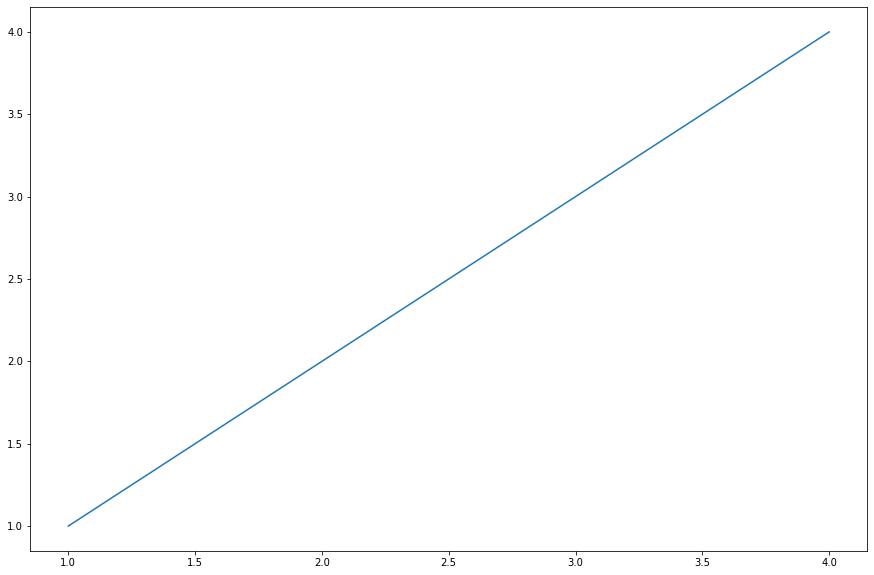

In [2]:
plt.figure(figsize = (15,10))
sns.lineplot(x=[1,2,3,4], y=[1,2,3,4])
plt.show()